In [1]:
##### K Nearest Neighbors

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:/Users/baeza/OneDrive/Desktop/CS 760 Fall 2020/titanic_data.csv").astype(float)

In [3]:
# df  

In [4]:
X = df.iloc[:,1:].to_numpy()

In [5]:
y = df.iloc[:,0].to_numpy()


In [6]:
def nearest_neigbors(X: np.ndarray, y: np.array, x: np.array, k: int)->float:

    if k > len(X):
        print("Too many Neighbors")
        return 
    elif k < 1:
        print("Not enough Neighbors")
        return 
    X_new = np.array([x for i in range(len(X)) ])
    
    X_diffs = np.array(X -X_new)
    dists = list(map(np.linalg.norm, X_diffs))
    neighbors = sorted(list( (d,i) for (d,i)
                              in zip(dists,[i for i in range(len(dists))])),
                                key = lambda z: z[0])
    
    k_neighbors = neighbors[:k]
    
    k_neighbors_response = [y[kn[1]] for kn in k_neighbors]
    
    return max(set(k_neighbors_response), key = k_neighbors_response.count)
    
        

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x_new = np.array([3, 1, 27, 0, 1, 7.25]) 

In [9]:
nearest_neigbors(X,y,x_new,10) 

1.0

In [10]:
y_ax = [nearest_neigbors(X,y,x_new,i) for i in range(1, len(X)+1)]
x_ax = [i for i in range(1, len(X)+1)]

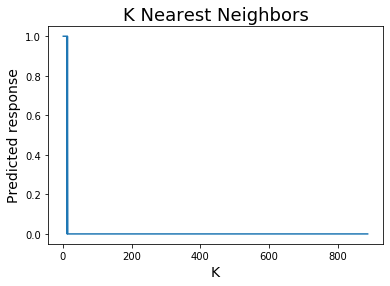

In [11]:
plt.xlabel("K", fontsize=14 )
plt.ylabel("Predicted response", fontsize=14)
plt.title("K Nearest Neighbors", fontsize=18)
plt.plot(x_ax, y_ax)
plt.show()

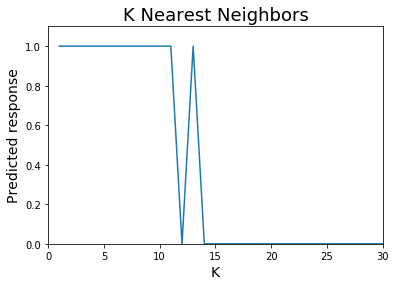

In [12]:
plt.xlabel("K", fontsize=14 )
plt.ylabel("Predicted response", fontsize=14)
plt.title("K Nearest Neighbors", fontsize=18)
plt.plot(x_ax, y_ax)
plt.axis([0,30, 0, 1.1])
plt.show()

In [13]:
##### Naive Bayes

In [14]:
count = df.groupby(["Survived"]).count()
count

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,
0.0,545,545,545,545,545,545
1.0,342,342,342,342,342,342


In [15]:
#  Binomial MLE 
def P_survive(y: float)->float:
    return (342/887) if y==1.0 else (545/887)

In [16]:
count = df.groupby(["Survived","Pclass"]).count()
count

Sex  Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived Pclass                                                               
0.0      1.0      80   80                       80                       80   
         2.0      97   97                       97                       97   
         3.0     368  368                      368                      368   
1.0      1.0     136  136                      136                      136   
         2.0      87   87                       87                       87   
         3.0     119  119                      119                      119   

                 Fare  
Survived Pclass        
0.0      1.0       80  
         2.0       97  
         3.0      368  
1.0      1.0      136  
         2.0       87  
         3.0      119

In [17]:
# Multinomial MLE 
def P_pclass(x_j: float, y: float)->float:
    if x_j == 1.0:
        return 136/342 if y ==1.0 else 80/545
    if x_j == 2.0:
        return 87/342 if y ==1.0 else 97/545
    else:
        return 119/342 if y ==1.0 else 368/545
        

In [18]:
count = df.groupby(["Survived","Sex"]).count()
count

Pclass  Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived Sex                                                                  
0.0      0.0     464  464                      464                      464   
         1.0      81   81                       81                       81   
1.0      0.0     109  109                      109                      109   
         1.0     233  233                      233                      233   

              Fare  
Survived Sex        
0.0      0.0   464  
         1.0    81  
1.0      0.0   109  
         1.0   233

In [19]:
# Binomial MLE 
def P_sex(x_j: float, y: float)->float:
    if x_j ==1.0:
        return 233/342 if y ==1.0 else 81/545
    else:
        return 109/342 if y ==1.0 else 464/545 

In [20]:
count = df.groupby(["Survived","Age"]).count() 
count

Pclass  Sex  Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived Age                                                                   
0.0      1.0        2    2                        2                        2   
         2.0        7    7                        7                        7   
         3.0        2    2                        2                        2   
         4.0        3    3                        3                        3   
         5.0        2    2                        2                        2   
...               ...  ...                      ...                      ...   
1.0      58.0       3    3                        3                        3   
         60.0       2    2                        2                        2   
         62.0       2    2                        2                        2   
         63.0       2    2                        2                        2   
         80.0       1    1                        1                        1   

               Fare  
Survived Age         
0.0      1.0      2  
         2.0      7  
         3.0      2  
         4.0      3  
         5.0      2  
...             ...  
1.0      58.0     3  
         60.0     2  
         62.0     2  
         63.0     2  
         80.0     1  

[146 rows x 5 columns]

In [21]:
from math import exp, sqrt, pi

# Normal MLE
age_arr = df.iloc[:,0:4:3].to_numpy()
age_mean_1 = sum([row[1] for row in age_arr if row[0]==1.0])/len(age_arr)
age_mean_0 = sum([row[1] for row in age_arr if row[0]==0.0])/len(age_arr)

age_sigma_1 = sqrt(sum([(1.0 -row[1])**2 for row in age_arr if row[0]==1.0])/len(age_arr))
age_sigma_0 = sqrt(sum([(row[1])**2 for row in age_arr if row[0]==0.0])/len(age_arr))

def P_age(x_j: float, y: float)->float:
    if y==1.0:
        return exp(-0.5*((x_j - age_mean_1)/age_sigma_1)**2)/(sqrt(2*pi)*age_sigma_1) 
    else:
        return exp(-0.5*((x_j - age_mean_0)/age_sigma_0)**2)/(sqrt(2*pi)*age_sigma_0) 

In [22]:
count = df.groupby(["Survived","Siblings/Spouses Aboard"]).count()
count

Pclass  Sex  Age  Parents/Children Aboard  \
Survived Siblings/Spouses Aboard                                              
0.0      0.0                         394  394  394                      394   
         1.0                          97   97   97                       97   
         2.0                          15   15   15                       15   
         3.0                          12   12   12                       12   
         4.0                          15   15   15                       15   
         5.0                           5    5    5                        5   
         8.0                           7    7    7                        7   
1.0      0.0                         210  210  210                      210   
         1.0                         112  112  112                      112   
         2.0                          13   13   13                       13   
         3.0                           4    4    4                        4   
         4.0                           3    3    3                        3   

                                  Fare  
Survived Siblings/Spouses Aboard        
0.0      0.0                       394  
         1.0                        97  
         2.0                        15  
         3.0                        12  
         4.0                        15  
         5.0                         5  
         8.0                         7  
1.0      0.0                       210  
         1.0                       112  
         2.0                        13  
         3.0                         4  
         4.0                         3

In [23]:
# Multinomial MLE, Laplace smoothed
def P_sibsps(x_j: float, y: float)->float:
    if x_j ==0.0:
        return (210+1)/(342 +7) if y==1.0 else (394+1)/(545 +7)
    elif x_j ==1.0:
        return (112+1)/(342 +7) if y==1.0 else (97+1)/(545 +7)
    elif x_j ==2.0:
        return (13+1)/(342 +7) if y==1.0 else (15+1)/(545 +7)
    elif x_j ==3.0:
        return (4+1)/(342 +7) if y==1.0 else (12+1)/(545 +7)
    elif x_j ==4.0:
        return (3+1)/(342 +7) if y==1.0 else (15+1)/(545 +7)
    elif x_j ==5.0:
        return (0+1)/(342 +7) if y==1.0 else (5+1)/(545 +7)
    else:
        return (0+1)/(342 +7) if y==1.0 else (7+1)/(545 +7)

In [24]:
count = df.groupby(["Survived","Parents/Children Aboard"]).count() 
count

Pclass  Sex  Age  Siblings/Spouses Aboard  \
Survived Parents/Children Aboard                                              
0.0      0.0                         441  441  441                      441   
         1.0                          53   53   53                       53   
         2.0                          40   40   40                       40   
         3.0                           2    2    2                        2   
         4.0                           4    4    4                        4   
         5.0                           4    4    4                        4   
         6.0                           1    1    1                        1   
1.0      0.0                         233  233  233                      233   
         1.0                          65   65   65                       65   
         2.0                          40   40   40                       40   
         3.0                           3    3    3                        3   
         5.0                           1    1    1                        1   

                                  Fare  
Survived Parents/Children Aboard        
0.0      0.0                       441  
         1.0                        53  
         2.0                        40  
         3.0                         2  
         4.0                         4  
         5.0                         4  
         6.0                         1  
1.0      0.0                       233  
         1.0                        65  
         2.0                        40  
         3.0                         3  
         5.0                         1

In [25]:
# Multinomial MLE, Laplace smoothed
def P_parchi(x_j: float, y: float)->float:
    if x_j ==0.0:
        return (233+1)/(342 +7) if y==1.0 else (441+1)/(545 +7)
    elif x_j ==1.0:
        return (65+1)/(342 +7) if y==1.0 else (53+1)/(545 +7)
    elif x_j ==2.0:
        return (40+1)/(342 +7) if y==1.0 else (40+1)/(545 +7)
    elif x_j ==3.0:
        return (3+1)/(342 +7) if y==1.0 else (2+1)/(545 +7)
    elif x_j ==4.0:
        return (0+1)/(342 +7) if y==1.0 else (4+1)/(545 +7)
    elif x_j ==5.0:
        return (1+1)/(342 +7) if y==1.0 else (1+1)/(545 +7)
    else:
        return (0+1)/(342 +7) if y==1.0 else (1+1)/(545 +7)

In [26]:
count = df.groupby(["Survived","Fare"]).count()
count

Pclass  Sex  Age  Siblings/Spouses Aboard  \
Survived Fare                                                  
0.0      0.0000        14   14   14                       14   
         4.0125         1    1    1                        1   
         5.0000         1    1    1                        1   
         6.2375         1    1    1                        1   
         6.4375         1    1    1                        1   
...                   ...  ...  ...                      ...   
1.0      227.5250       3    3    3                        3   
         247.5208       1    1    1                        1   
         262.3750       2    2    2                        2   
         263.0000       2    2    2                        2   
         512.3292       3    3    3                        3   

                   Parents/Children Aboard  
Survived Fare                               
0.0      0.0000                         14  
         4.0125                          1  
         5.0000                          1  
         6.2375                          1  
         6.4375                          1  
...                                    ...  
1.0      227.5250                        3  
         247.5208                        1  
         262.3750                        2  
         263.0000                        2  
         512.3292                        3  

[330 rows x 5 columns]

In [27]:
# Normal MLE
fare_arr = df.iloc[:,0:7:6].to_numpy()
fare_mean_1 = sum([row[1] for row in fare_arr if row[0]==1.0])/len(fare_arr)
fare_mean_0 = sum([row[1] for row in fare_arr if row[0]==0.0])/len(fare_arr)

fare_sigma_1 = sqrt(sum([(1.0 -row[1])**2 for row in fare_arr if row[0]==1.0])/len(fare_arr))
fare_sigma_0 = sqrt(sum([(row[1])**2 for row in fare_arr if row[0]==0.0])/len(fare_arr))

def P_fare(x_j: float, y: float)->float:
    if y==1.0:
        return exp(-0.5*((x_j - fare_mean_1)/fare_sigma_1)**2)/(sqrt(2*pi)*fare_sigma_1) 
    else:
        return exp(-0.5*((x_j - fare_mean_0)/fare_sigma_0)**2)/(sqrt(2*pi)*fare_sigma_0) 


In [28]:
def naive_bayes(x: np.array):
    def _probs(y: float, x: np.array)->float: 
        return P_survive(y)*P_pclass(x[0],y)*P_sex(x[1],y)*P_age(x[2],y)\
            *P_sibsps(x[3],y)*P_parchi(x[4],y)*P_fare(x[5],y)
    return 1.0 if _probs(1,x) > _probs(0,x) else 0.0

In [29]:
# same as above, just a reminder
x_new = np.array([3, 1, 27, 0, 1, 7.25]) 

In [30]:
naive_bayes(x_new)

1.0

In [31]:
##### k-fold cross validation

In [32]:
from functools import reduce
from random import randrange

# split data into k folds 
def k_fold_split(data: np.ndarray, k: int)-> np.ndarray:
    data_split = []
    data_copy = data
    subset_size = len(data_copy)//k
    
    # save k subsets  
    for i in range(k):
        subset = []
        # add elements to subset.
        while len(subset) < subset_size and len:
            # select a random element and determine its index
            index = randrange(len(data_copy))
            elem = data_copy[index]
            # save the randomly selected line and  
            # delete it so it is not chosen again 
            subset.append(elem)
            data_copy = np.delete(data_copy, index, axis=0)
        # save subset
        data_split.append(np.asarray(subset))
        
    return data_split


# k-fold cross validation for K-Nearest Neighbors and Naive Bayes
def k_fold_cv_KNN_NB(data: np.ndarray, k: int, mode: str="KNN", K: int=20)-> np.ndarray:
    k_folds = k_fold_split(data, k)
    results = []
    
    
    # detemine training sets and test sets
    for i in range(k):
        cv = np.array([])
        # get all fold indicies and remove one for testing
        train_folds = [l for l in range(k)]
        train_folds.pop(i)
        
        # collect remaining folds into a data set.   
        for j in train_folds:
            # combine remaining folds into training dataset
            # set cv to be the first remaining fold, 
            # then append the rest
            if j == train_folds[0]:
                cv = k_folds[j]
            else:
                cv = np.concatenate((cv, k_folds[j]), axis=0)
       
        # apply models
        if mode == 'KNN':    
            y_data = data[:,0]
            X_data = data[:,1:]
            test_predicts = [nearest_neigbors(X_data,y_data,row[1:],K)for row in k_folds[i]] 
        elif mode == 'NB':    
            test_predicts = [naive_bayes(row) for row in k_folds[i]] 
       
            
        #calculate accuracy
        acc = float(reduce(np.add, list(map(lambda r: 1 if r[0]==r[1][0] else 0, zip(test_predicts, k_folds[i][:])))))
        results.append(acc/len(test_predicts)) 
    
    return sum(results)/len(results)

In [33]:
data=df.to_numpy()
K=1
kcv_KNN = k_fold_cv_KNN_NB(data,10,mode="KNN",K=K) 
print(f"The 10-fold cross validation accuracy for {K}-Nearest Neighbors is\n{kcv_KNN}") 

The 10-fold cross validation accuracy for 1-Nearest Neighbors is
0.9784090909090908


In [34]:
kcv_NB = k_fold_cv_KNN_NB(data,10,mode="NB") 
print(f"The 10-fold cross validation accuracy for Naive Bayes is\n{kcv_NB}") 

The 10-fold cross validation accuracy for Naive Bayes is
0.7738636363636364
